In [4]:
import torch
import numpy as np
import matplotlib.pyplot as plt
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [7]:
from modules import Net
net = Net()
chkpnt = torch.load(r'outputs/t2-label_smooth/chkpnt.pt', map_location=device)
net.load_state_dict(chkpnt['model_dict'], strict=True)
net.eval()
del chkpnt

In [43]:
def sqnr(x, xq):
    x = x.view(-1)
    xq = x.view(-1)
    s = (x**2).mean()
    n = ((x-xq)**2).mean()
    res = s / n
    return 10*torch.log10(res)

SyntaxError: invalid syntax (1712438713.py, line 3)

backbone.1.weight torch.Size([32, 3, 3, 3])
tensor(27.9427)


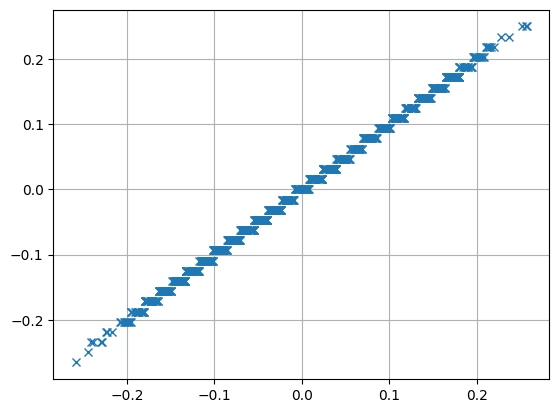

backbone.2.weight torch.Size([32])
backbone.2.bias torch.Size([32])
backbone.5.weight torch.Size([32, 32, 3, 3])
backbone.6.weight torch.Size([32])
backbone.6.bias torch.Size([32])
backbone.9.weight torch.Size([51, 32, 3, 3])
backbone.9.bias torch.Size([51])
backbone.10.weight torch.Size([51])
backbone.10.bias torch.Size([51])
backbone.14.weight torch.Size([81, 51, 3, 3])
backbone.14.bias torch.Size([81])
backbone.15.weight torch.Size([81])
backbone.15.bias torch.Size([81])
backbone.19.weight torch.Size([129, 81, 3, 3])
backbone.19.bias torch.Size([129])
backbone.20.weight torch.Size([129])
backbone.20.bias torch.Size([129])
backbone.24.weight torch.Size([206, 129, 3, 3])
backbone.24.bias torch.Size([206])
backbone.25.weight torch.Size([206])
backbone.25.bias torch.Size([206])
dense.1.weight torch.Size([10, 206])
dense.1.bias torch.Size([10])


In [61]:
b = 6
with torch.no_grad():
    for name, p in net.named_parameters():
        print(name, p.shape)
        if name == "backbone.1.weight":
            pq = torch.round(p * 2**b) / 2**b
            print(sqnr(p, pq))
            plt.plot(p.view(-1), pq.view(-1), 'x')
            plt.grid(True)
            plt.show()

tensor([-2.])